In [103]:
import pandas as pd
import numpy as np
import re 
import geopandas as gpd
import pandas as pd
import json
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style="whitegrid")
import warnings

warnings.filterwarnings("ignore")

In [104]:
filepath= 'data/demographics/budgets.csv'
budgets_df = pd.read_csv(filepath)

def convert_name(name):
    nm_list = name.split(':')[::-1]
    return ', '.join(nm_list).strip()
    
budgets_df['city_merge_name'] = budgets_df['city_name'].apply(convert_name)
budgets_df['state'] = budgets_df['city_name'].apply(lambda name:name.split(":")[0])
budgets_df[budgets_df.year==2017].head()

,year,city_name,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,...,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt,city_merge_name,state
40,2017,AK: Anchorage,22002001.0,297216,1.0,5694.71,4819.11,2087.49,130.60,1956.89,...,2011.64,NaN,NaN,NaN,4.0,NaN,NaN,1.0,"Anchorage, AK",AK
81,2017,AK: Fairbanks,22006001.0,32015,1.0,1875.06,1875.06,654.10,4.09,650.01,...,6009.89,Fairbanks North Star,21006002.0,100683.0,5.0,NaN,NaN,0.0,"Fairbanks, AK",AK
122,2017,AL: Birmingham,12037003.0,211436,1.0,3655.60,2424.82,213.32,45.73,167.59,...,2879.90,Jefferson,11037037.0,660326.0,1.0,24693.0,1.0,0.0,"Birmingham, AL",AL
163,2017,AL: Mobile,12049004.0,191885,1.0,2408.76,2083.78,90.65,43.90,46.75,...,1497.00,Mobile,11049049.0,415499.0,2.0,25673.0,1.0,0.0,"Mobile, AL",AL
204,2017,AL: Montgomery,12051001.0,200360,1.0,1889.79,1339.40,141.95,24.14,117.81,...,1797.75,Montgomery,11051051.0,227072.0,2.0,28347.0,1.0,0.0,"Montgomery, AL",AL


In [106]:
fbi_data = pd.read_csv('CleanData/FBI_Crime.csv')
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Fort Lauderdale, FL')].index.values,'city_fbi'] = 'Ft. Lauderdale, FL'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('St, FL')].index.values,'city_fbi'] = 'St. Petersburg, FL'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Fort Smith, AR')].index.values,'city_fbi'] = 'Ft. Smith, AR'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Fort Wayne, IN')].index.values,'city_fbi'] = 'Ft. Wayne, IN'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Gary, IL')].index.values,'city_fbi'] = 'Gary, IN'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Kansas City, MO')].index.values,'city_fbi'] = 'Kansas City, KS'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('St, MO')].index.values,'city_fbi'] = 'St. Louis, MO'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('St, MN')].index.values,'city_fbi'] = 'St. Paul, MN'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('CharlotteMecklenburg, NC')].index.values,'city_fbi'] = 'Charlotte, NC'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Las Vegas Metropolitan Police Department, NV')].index.values,'city_fbi'] = 'Las Vegas, NV'
budgets_df.loc[budgets_df.loc[budgets_df['city_merge_name'].str.contains('Oklahoma, OK')].index.values,'city_merge_name'] = 'Oklahoma City, OK'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Fort Worth, TX')].index.values,'city_fbi'] = 'Ft. Worth, TX'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Frederick, DC')].index.values,'city_fbi'] = 'Frederick, MD'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Wilmington, PA')].index.values,'city_fbi'] = 'Wilmington, DE'


### Cities that are missing from FBI dataset:
- Huntington Beach, CA
- Wilmington, DE
- Hialeah, FL
- Aurora, IL
- Yonkers, NY
- This one is interesting (needs: Kansas City, MO
- Garland, TX
- Chesapeake, VA
- Rutland, VT


packages to look at scikit fuzzy

In [107]:
for i in budgets_df['city_merge_name'].unique():
    if(i not in fbi_data['city_fbi'].unique()):
        print(i)

Mesa, AZ
Average for Cities
Anaheim, CA
Fremont, CA
Huntington Beach, CA
Long Beach, CA
Santa Ana, CA
Aurora, CO
Hialeah, FL
Nampa, ID
Aurora, IL
Frederick, MD
Warren, MI
Kansas City, MO
Median for Cities
Nashua, NH
Yonkers, NY
Warwick, RI
Arlington, TX
Garland, TX
Chesapeake, VA
Rutland, VT


In [118]:
merged_df = budgets_df.merge(fbi_data,left_on=['city_merge_name','year'],right_on = ['city_fbi','year'],how='inner')
merged_df['city_merge_name'].unique()

array(['Anchorage, AK', 'Fairbanks, AK', 'Birmingham, AL', 'Mobile, AL',
       'Montgomery, AL', 'Ft. Smith, AR', 'Little Rock, AR',
       'Phoenix, AZ', 'Tucson, AZ', 'Bakersfield, CA', 'Fresno, CA',
       'Los Angeles, CA', 'Modesto, CA', 'Oakland, CA', 'Riverside, CA',
       'Sacramento, CA', 'San Diego, CA', 'San Francisco, CA',
       'San Jose, CA', 'Stockton, CA', 'Colorado Springs, CO',
       'Denver, CO', 'Bridgeport, CT', 'Hartford, CT', 'New Haven, CT',
       'Washington, DC', 'Dover, DE', 'Wilmington, DE',
       'Ft. Lauderdale, FL', 'Jacksonville, FL', 'Miami, FL',
       'Orlando, FL', 'St. Petersburg, FL', 'Tallahassee, FL',
       'Tampa, FL', 'Atlanta, GA', 'Columbus, GA', 'Cedar Rapids, IA',
       'Des Moines, IA', 'Boise, ID', 'Chicago, IL', 'Ft. Wayne, IN',
       'Gary, IN', 'Indianapolis, IN', 'Kansas City, KS', 'Topeka, KS',
       'Wichita, KS', 'Lexington, KY', 'Louisville, KY',
       'Baton Rouge, LA', 'New Orleans, LA', 'Shreveport, LA',
       'Bost

### Let's Do Some Sanity Checking

In [119]:
for i in budgets_df['city_merge_name'].unique():
    if(i not in merged_df['city_merge_name'].unique()):
        print(i)

Mesa, AZ
Average for Cities
Anaheim, CA
Fremont, CA
Huntington Beach, CA
Long Beach, CA
Santa Ana, CA
Aurora, CO
Hialeah, FL
Nampa, ID
Aurora, IL
Frederick, MD
Warren, MI
Kansas City, MO
Median for Cities
Nashua, NH
Yonkers, NY
Warwick, RI
Arlington, TX
Garland, TX
Chesapeake, VA
Rutland, VT


### Ok cool!

In [120]:
budgets_df.columns

Index(['year', 'city_name', 'id_city', 'city_population', 'cpi',
       'rev_total_city', 'rev_general_city', 'intergovt_rev_city',
       'igr_federal_city', 'igr_state_city',
       ...
       'cash_other_other', 'county_name', 'id_county', 'county_population',
       'relationship_city_school', 'enrollment', 'districts_in_city',
       'consolidated_govt', 'city_merge_name', 'state'],
      dtype='object', length=664)

### Let's Dig into the Data

In [133]:
fbi_cols = ['violent_crime','property_crime']
fisc_cols =['rev_total','police','education_services','education','educ_higher','educ_elem_sec','social_services','public_welfare','welfare_cash','welfare_vendors','welfare_other','correction','parks_recreation','housing_commdevt']
display_cols  = ['city_merge_name','population','city_population','year']
merged_df = merged_df[display_cols+fbi_cols+fisc_cols].drop_duplicates()
merged_df['violent_crime'] = merged_df['violent_crime'].apply(float)
merged_df 

,city_merge_name,population,city_population,year,violent_crime,property_crime,rev_total,police,education_services,education,educ_higher,educ_elem_sec,social_services,public_welfare,welfare_cash,welfare_vendors,welfare_other,correction,parks_recreation,housing_commdevt
0,"Anchorage, AK",260900,259348,2000,584.1,4347.3,5523.35,352.61,2426.51,2386.40,0.0,2386.40,195.60,0.00,0.0,0.0,0.00,0.00,213.45,0.00
1,"Anchorage, AK",263588,260816,2001,663.2,4350.0,4831.29,594.42,2281.82,2251.80,0.0,2251.80,138.03,0.00,0.0,0.0,0.00,0.00,266.67,0.00
2,"Anchorage, AK",267280,264274,2002,643.9,4470.6,4914.64,708.42,2455.38,2426.06,0.0,2426.06,165.42,0.00,0.0,0.0,0.00,0.00,285.35,0.00
3,"Anchorage, AK",282940,268229,2003,678.9,4548.3,4463.29,320.32,2590.59,2561.61,0.0,2561.61,176.95,0.00,0.0,0.0,0.00,0.00,121.36,0.00
4,"Anchorage, AK",286671,270568,2004,806.2,3818.7,5007.39,325.37,2627.83,2599.76,0.0,2599.76,143.11,0.00,0.0,0.0,0.00,0.00,136.75,0.00
5,"Anchorage, AK",291624,274484,2005,753.7,4276.1,4944.86,335.65,2636.72,2609.39,0.0,2609.39,108.67,0.00,0.0,0.0,0.00,0.00,114.36,0.00
6,"Anchorage, AK",294862,276494,2006,932.3,4366.4,5198.61,338.51,2632.71,2602.54,0.0,2602.54,115.17,0.00,0.0,0.0,0.00,0.00,121.03,0.00
7,"Anchorage, AK",303996,280085,2007,830.9,4002.4,5708.19,357.36,2416.47,2388.57,0.0,2388.57,102.82,0.00,0.0,0.0,0.00,0.00,278.45,0.00
8,"Anchorage, AK",301010,278792,2008,922.9,3379.3,5371.80,411.99,2786.04,2751.24,0.0,2751.24,102.27,0.00,0.0,0.0,0.00,0.00,320.45,0.00
9,"Anchorage, AK",305284,281554,2009,853.6,3672.0,5060.77,427.53,2891.44,2852.57,0.0,2852.57,105.32,0.00,0.0,0.0,0.00,0.00,277.30,0.00


In [135]:
total_country_proxy = merged_df.groupby('year').sum().reset_index()
total_country_proxy['year'] = pd.to_datetime(total_country_proxy['year'].apply(str))
total_country_proxy

,year,population,city_population,violent_crime,property_crime,rev_total,police,education_services,education,educ_higher,educ_elem_sec,social_services,public_welfare,welfare_cash,welfare_vendors,welfare_other,correction,parks_recreation,housing_commdevt
0,2000-01-01,126655616,46556438,50222.2,417702.2,590812.48,34892.74,174671.53,170200.76,999.67,169201.11,50386.65,15722.70,3808.01,1123.68,10791.02,8728.04,16861.89,25249.22
1,2001-01-01,138930525,49206976,57409.4,474323.2,631191.24,38345.21,193836.22,188650.08,1033.45,187616.61,50216.99,17037.77,3625.22,1260.57,12152.00,9435.33,20045.55,26515.56
2,2002-01-01,139404514,48896572,54896.2,469933.7,608922.62,39124.85,192453.05,186775.98,1112.17,185663.83,54563.61,18238.36,3707.93,1348.35,13182.06,10097.77,20637.11,28278.16
3,2003-01-01,166168748,49837225,52699.7,436839.6,607042.59,38405.85,194265.67,188637.18,1447.50,187189.70,60217.48,21294.60,3732.94,3583.83,13977.85,10112.70,20470.64,28143.57
4,2004-01-01,168572979,50494156,53861.1,452532.2,686547.40,40629.64,203095.36,197353.54,1878.45,195475.07,67135.37,21362.55,3486.74,4200.64,13675.22,10480.40,19466.15,29536.89
5,2005-01-01,172052066,51916680,56114.9,441238.4,702976.59,41439.18,209967.64,203947.90,1786.61,202161.33,65147.07,22141.42,3513.54,3976.72,14651.22,11352.82,20531.96,30614.20
6,2006-01-01,176452829,53040851,55269.4,434595.0,728938.30,42749.71,216164.76,210155.74,1787.52,208368.22,67712.86,22689.33,3560.52,4459.70,14669.13,11906.66,21883.22,30746.76
7,2007-01-01,180636516,53449259,53588.0,414198.8,769671.54,44061.94,218895.46,212575.57,1653.93,210921.70,67149.62,23032.50,3300.21,5011.07,14721.25,13307.41,21780.76,31560.64
8,2008-01-01,175641332,52501023,54264.4,400825.3,720306.24,44024.85,220295.76,214322.00,1840.21,212481.81,67853.59,22965.55,3150.58,4875.56,14939.46,12666.97,22218.14,31121.65
9,2009-01-01,189524151,54721504,52662.1,394646.3,685803.18,48715.42,238438.75,232073.61,1971.85,230101.74,77175.21,23938.05,3342.63,6028.19,14567.22,13690.31,22540.64,34684.42


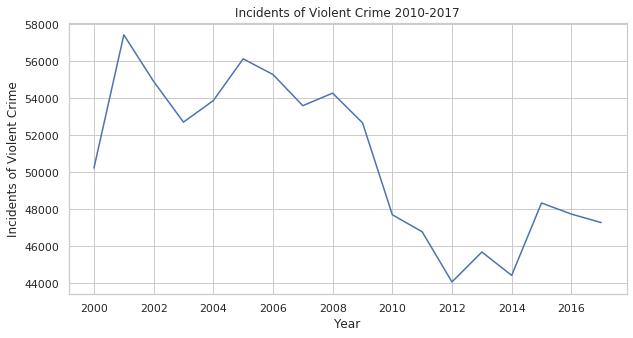

In [136]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=total_country_proxy,x='year',y='violent_crime')
_= ax.set_xlabel("Year")
_= ax.set_ylabel("Incidents of Violent Crime") 
_= plt.title("Incidents of Violent Crime 2010-2017")

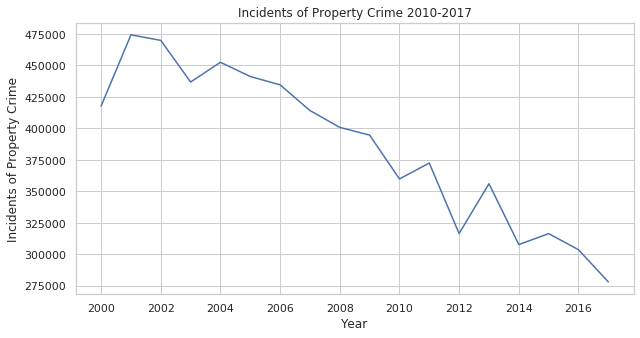

In [137]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=total_country_proxy,x='year',y='property_crime')
_= ax.set_xlabel("Year")
_= ax.set_ylabel("Incidents of Property Crime") 
_= plt.title("Incidents of Property Crime 2010-2017")

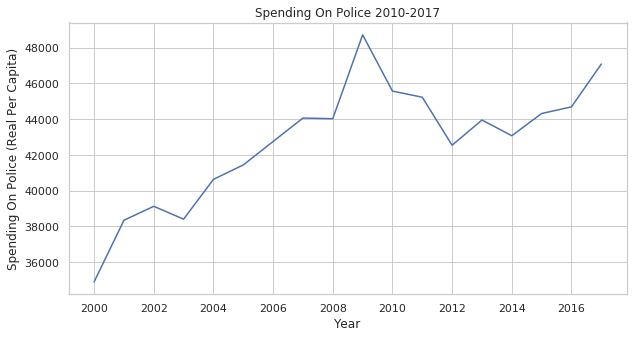

In [138]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=total_country_proxy,x='year',y='police')
_= ax.set_xlabel("Year")
_= ax.set_ylabel("Spending On Police (Real Per Capita)") 
_= plt.title("Spending On Police 2010-2017")

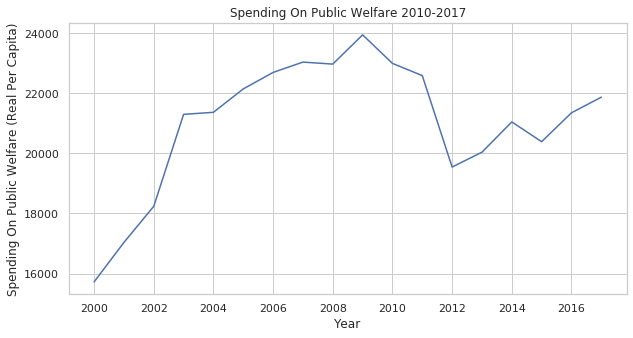

In [139]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=total_country_proxy,x='year',y='public_welfare')
_= ax.set_xlabel("Year")
_= ax.set_ylabel("Spending On Public Welfare (Real Per Capita)") 
_= plt.title("Spending On Public Welfare 2010-2017")

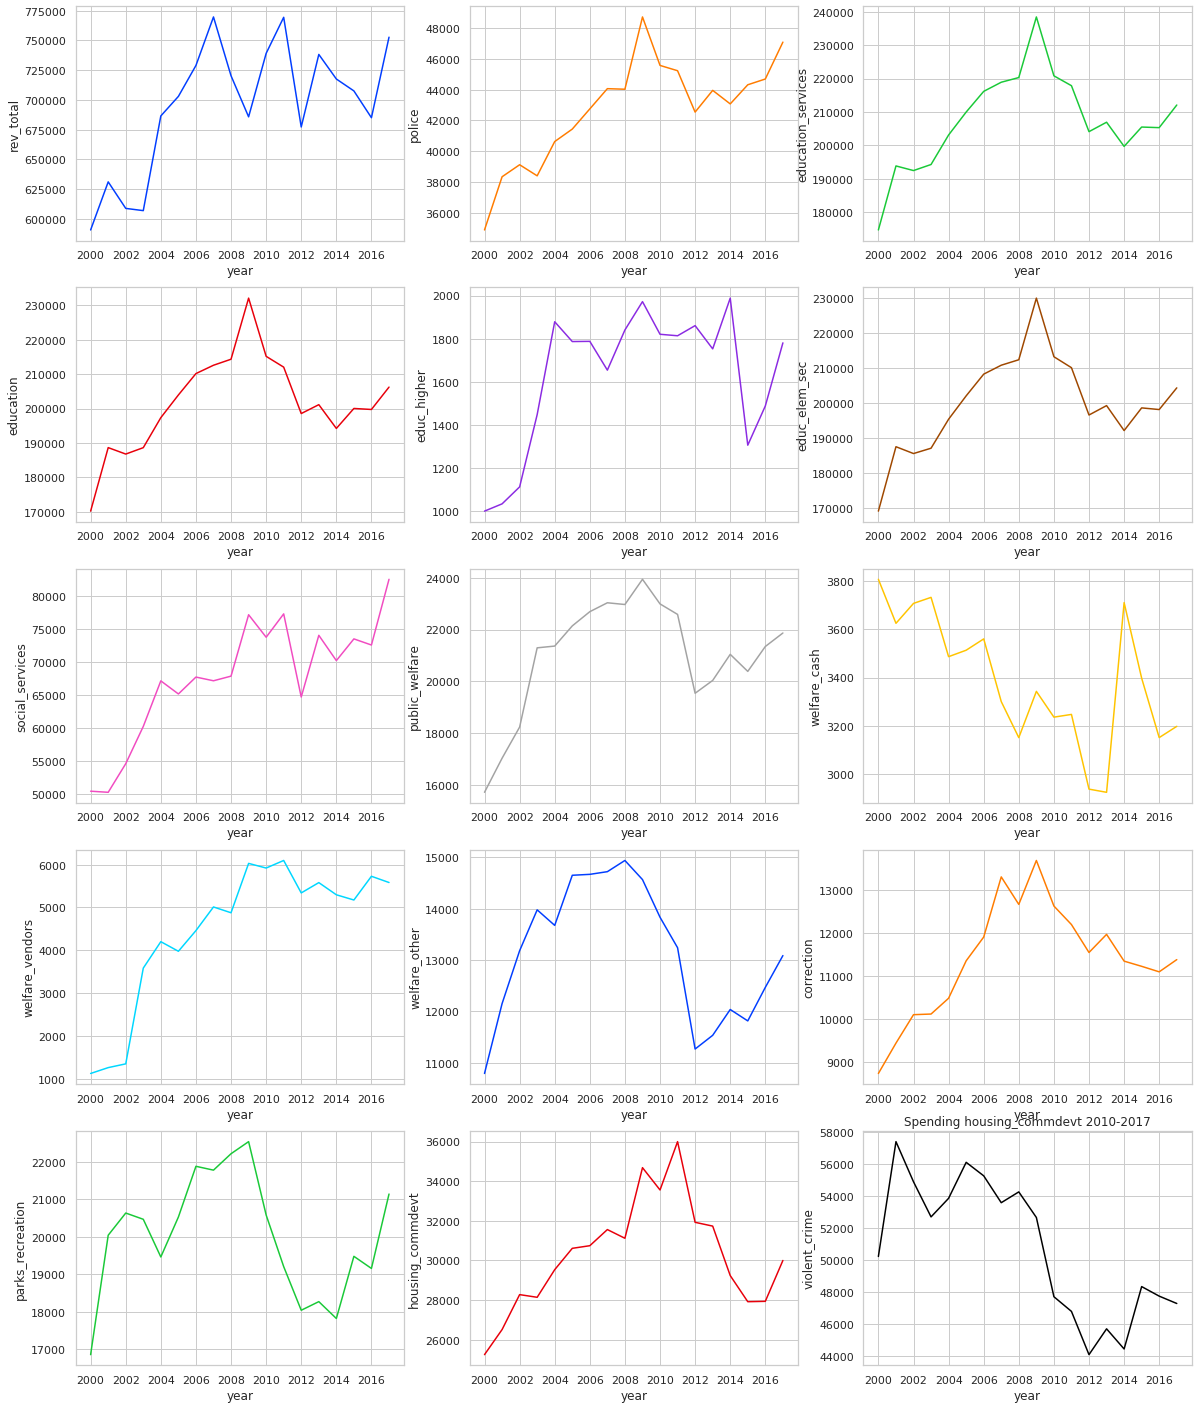

In [140]:
rows = 5
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 25))
pairs = [(i,j) for i in range(rows) for j in range(cols)]
colors = sns.color_palette("bright",15)
index = 0
for i in fisc_cols:
    a_x = pairs[index]
    sns.lineplot(data=total_country_proxy,x='year',y=i,ax=axes[a_x[0], a_x[1]],color=colors[index])
    index+=1
    _= ax.set_xlabel("Year")
    _= ax.set_ylabel("Spending On "+i+" (Real Per Capita)") 
    _= plt.title("Spending " +i+ " 2010-2017")

a_x = pairs[-1]
sns.lineplot(data=total_country_proxy,x='year',y='violent_crime',color='black')

#### Bokeh Cleaning Functions

In [159]:
def border_states_redacted(name):
    if ('--' in name):
        entry_split= name.split(',')
        city_name=entry_split[0]
        states = entry_split[1].split('--')
        for i in states:
            print(city_name,i)
            
def border_states(name):
    if ('--' in name or '-' in name):
        entry_split= name.split(',')
        if (len(entry_split[0].split('--'))>1):
            print(entry_split[0].split('--'))
        city_name= entry_split[0].split('--')[0]
        state = entry_split[1].split('--')[0]
        return ','.join([city_name,state])
    else: 
        return name